In [61]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from numpy import pi as π
from scipy.integrate import quad, simps

In [62]:
from scipy.stats import truncexpon,expon

In [63]:
def trunc_exp(tau_new,tau_min,tau_max,E):
    b = tau_max-tau_min
    scale = 1/E
    return np.exp(-(tau_new-tau_min)/scale)/(1.0-np.exp(-b/scale))/scale

In [64]:
def trunc_exp_rvs_proko(tau_min,tau_max,E,N=100000):
    Z = 1 - np.exp(-E*(tau_max-tau_min))
    random_numbers = np.ones(N)
    for i in range(N):
        r = np.random.random()
        tau_new = tau_min - np.log(1-Z*r)  / E
        random_numbers[i] = tau_new
    return random_numbers

In [65]:
tau_min = 0
tau_max = 1
E = 10

b = tau_max-tau_min
scale = 1/E

N = 500000

# Generate support of pdf
x = np.linspace(tau_min,tau_max,1000)

# Homemade pdf
homemade_pdf = trunc_exp(x,tau_min,tau_max,E)

# Prokof'ev
rvs_proko = trunc_exp_rvs_proko(tau_min,tau_max,E,N)

# scipy.stats
# rvs_scipy = truncexpon.rvs(b=b/scale,scale=scale,size=N)

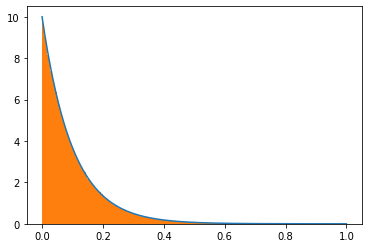

In [66]:
plt.plot(x,homemade_pdf)
plt.hist(rvs_proko, density=True, bins=500);
# plt.hist(rvs_scipy, density=True, bins=500);

In [67]:
# Check normalizations
print(simps(homemade_pdf,x))
print(sum(rvs_proko))

1.00000004164267
49865.673733136646


In [68]:
rvs_proko[0:11]

array([0.01362872, 0.11653466, 0.01962455, 0.06550264, 0.21779793,
       0.05383615, 0.04431456, 0.28045411, 0.21643174, 0.11031601,
       0.07047704])

1.0000203897302558
1.0000077461963977


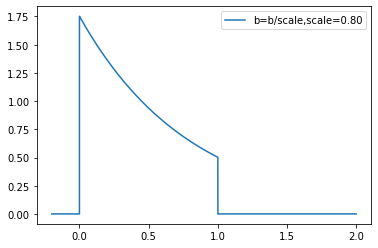

In [69]:
b = 1
x = np.linspace(-0.2,2*b,100000)
scale = 0.8

y1 = truncexpon.pdf(x,b,scale=scale)
y2 = truncexpon.pdf(x,b/scale,scale=scale)

# Check normalizations
print(simps(y1,x))
print(simps(y2,x))

#plt.plot(x,y1,label="b=b,scale=%.2f"%scale)
plt.plot(x,y2,label="b=b/scale,scale=%.2f"%scale)
plt.legend();